# Warranty Claims Fraud Prediction

The aim of this project is to analyze the warranty claims based on their region, product, claim value and other features to predict their authenticity

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
# load the data
df = pd.read_csv('warranty_data.csv')
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


## Data Wrangling

In [34]:
df=df.drop(columns='Unnamed: 0')

In [35]:
df.head(1)

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1


In [36]:
df.shape

(358, 20)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            358 non-null    object 
 1   State             358 non-null    object 
 2   Area              358 non-null    object 
 3   City              358 non-null    object 
 4   Consumer_profile  358 non-null    object 
 5   Product_category  358 non-null    object 
 6   Product_type      358 non-null    object 
 7   AC_1001_Issue     358 non-null    int64  
 8   AC_1002_Issue     358 non-null    int64  
 9   AC_1003_Issue     358 non-null    int64  
 10  TV_2001_Issue     358 non-null    int64  
 11  TV_2002_Issue     358 non-null    int64  
 12  TV_2003_Issue     358 non-null    int64  
 13  Claim_Value       358 non-null    float64
 14  Service_Centre    358 non-null    int64  
 15  Product_Age       358 non-null    int64  
 16  Purchased_from    358 non-null    object 
 1

In [38]:
df.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df.nunique()

Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

In [41]:
df['Region'].value_counts()

South         85
North East    53
South East    50
West          49
East          39
North         33
North West    27
South West    22
Name: Region, dtype: int64

In [42]:
df.describe()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,0.332402,0.329609,0.203911,0.377095,0.452514,0.268156,11994.534916,12.812849,201.843575,11.931844,0.097765
std,0.629446,0.615182,0.529559,0.621943,0.670910,0.508353,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,0.000000,0.750000,0.000000,1.000000,1.000000,0.000000,15000.000000,15.000000,303.750000,23.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000,1.000000


### Outliar removal

In [43]:
# Removing outliners from claim value column using IQR method

Q1 = df['Claim_Value'].quantile(0.25)
Q3 = df['Claim_Value'].quantile(0.75)

IQR = Q3 - Q1

df = df[~((df['Claim_Value'] < (Q1 - 1.5 * IQR)) |(df['Claim_Value'] > (Q3 + 1.5 * IQR)))]

### Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

#Label encoding Object
le = LabelEncoder()

# columns for label encoding
features = df.select_dtypes(include=['object']).columns

# label encoding
for features in features:
    le.fit(df[features])
    df[features] = le.transform(df[features])
    print(features, df[features].unique())

Region [4 1 2 3 5 6 7 0]
State [10  6 16  9 11  0  2  5  3 13 19  4  8  1 15 12 18 17  7 14]
Area [1 0]
City [ 2  5  6 21 11  9 18 20 24 16 15  1 19 12 26 17 23  8 10  3 14  7  0 22
  4 25 13]
Consumer_profile [0 1]
Product_category [0 1]
Product_type [1 0]
Purchased_from [2 0 1]
Purpose [1 0 2]


### Correlation Heatmap

<Axes: >

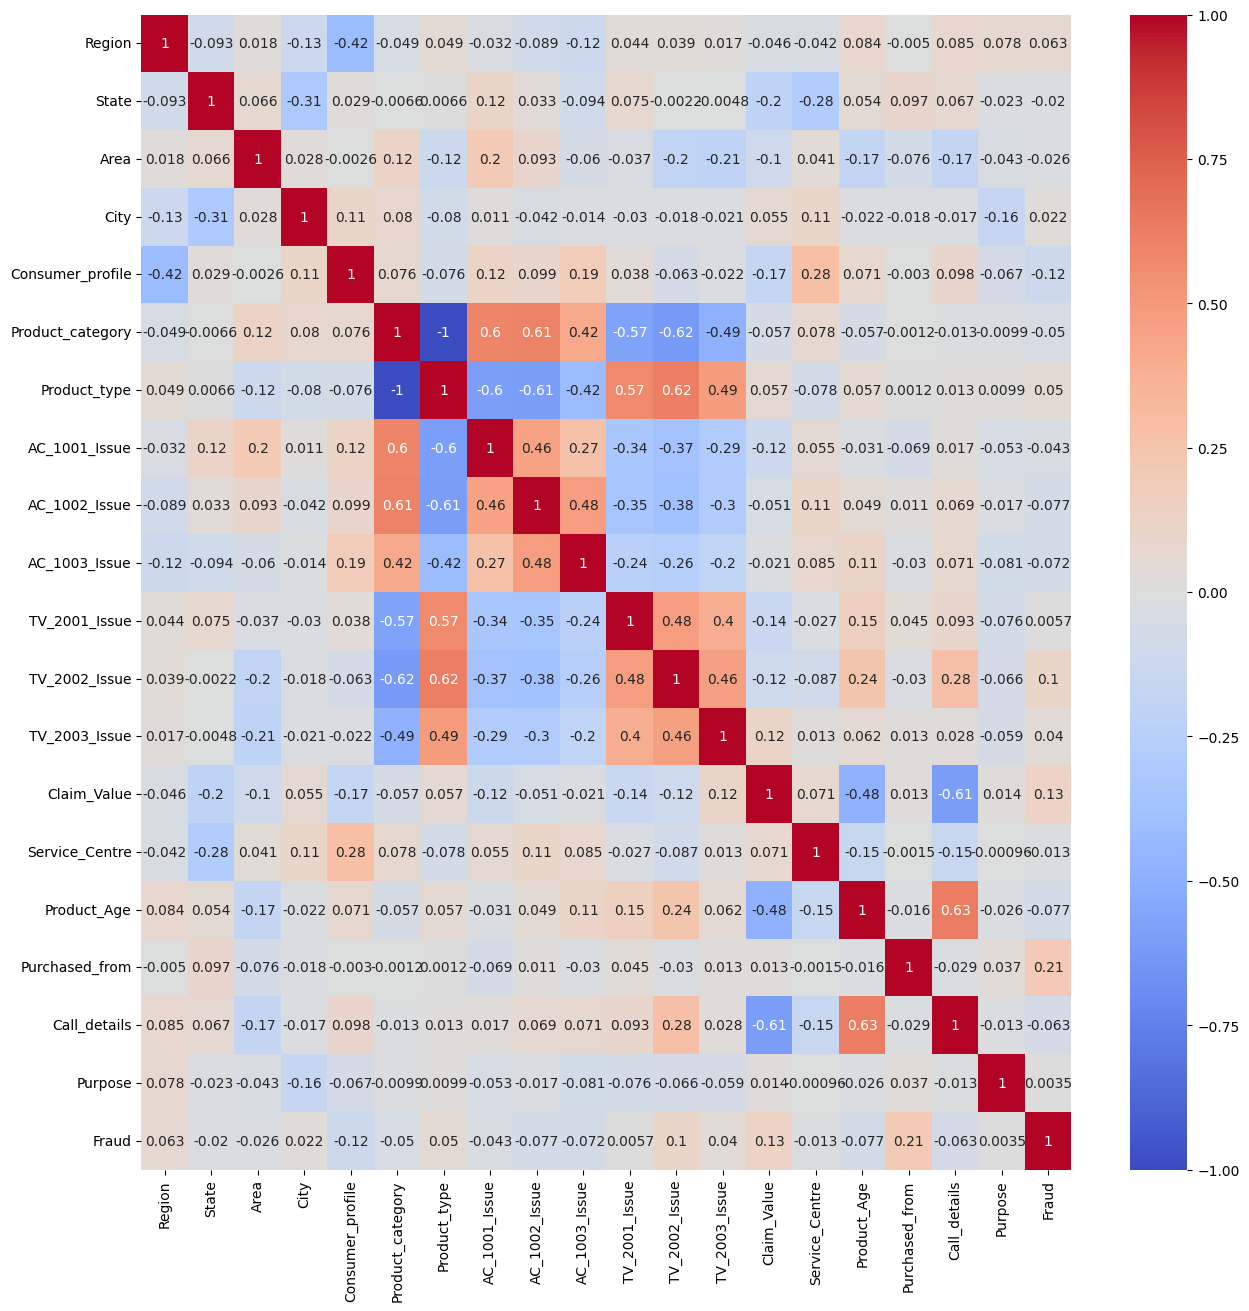

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Fraud',axis=1), df['Fraud'], test_size=0.30, random_state=42)

### Logistic Regression

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression Object
lr = LogisticRegression()

#Fitting the Logistic Regression to the training data
lr.fit(X_train,y_train)

#training accuracy
print(lr.score(X_train,y_train))

#prediction on test data
l_pred = lr.predict(X_test)

0.9184549356223176


### Random Forest classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

In [59]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Random Forest Classifier
grid = GridSearchCV(rfc, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for Random Forest Classifier
print(grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [60]:
#random forest classifier with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the Random Forest Classifier to the training data
rfc.fit(X_train,y_train)

#training accuracy
print(rfc.score(X_train,y_train))

#prediction on test data
r_pred = rfc.predict(X_test)

0.9184549356223176


### Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtree = DecisionTreeClassifier()

In [62]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for Decision Tree Classifier
print(grid.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [63]:
#Best estimator for Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the Decision Tree Classifier to the training data
dtree.fit(X_train,y_train)

#training accuracy
print(dtree.score(X_train,y_train))

#prediction on test data
d_pred = dtree.predict(X_test)

0.9313304721030042


### Model Accuracy

- Logistic regression - 0.9184549356223176
- Random Forest classifier - 0.9184549356223176
- Decision Tree Classifier - 0.9313304721030042